In [2]:
import pandas as pd
import wfdb
import json
from pathlib import Path

# --- Relative path setup ---
record_id = "TRM107-RHC1"
base_dir = Path("processed_data")

# Load WFDB record
record = wfdb.rdrecord(str(base_dir / record_id))

# Access signal data
signals, fields = record.p_signal, record.sig_name
print("Signals:", fields)
print("Sampling rate:", record.fs)

# Load metadata JSON
with open(base_dir / f"{record_id}.json", "r") as f:
    meta = json.load(f)
pd.DataFrame(meta.items(), columns=["Key", "Value"]).head()

Signals: ['patch_ECG', 'patch_ACC_lat', 'patch_ACC_hf', 'patch_ACC_dv', 'patch_Hum', 'patch_Pre', 'patch_Temp', 'ECG_lead_I', 'ECG_lead_II', 'ECG_lead_III', 'aVR', 'aVL', 'aVF', 'ECG_lead_V1', 'RHC_pressure', 'PLETH']
Sampling rate: 500


,Key,Value
0,age,54
1,height,190.5
2,weight,121.625
3,gender,Male
4,sbp,166


In [3]:
for i, name in enumerate(record.sig_name):
    print(f"{i+1}. {name} ({record.units[i]})")

1. patch_ECG (mV)
2. patch_ACC_lat (mg)
3. patch_ACC_hf (mg)
4. patch_ACC_dv (mg)
5. patch_Hum (%)
6. patch_Pre (mbar)
7. patch_Temp (Celsius)
8. ECG_lead_I (mV)
9. ECG_lead_II (mV)
10. ECG_lead_III (mV)
11. aVR (mV)
12. aVL (mV)
13. aVF (mV)
14. ECG_lead_V1 (mV)
15. RHC_pressure (mmHg)
16. PLETH (au)


In [4]:
fs = record.fs  # 500 Hz
n_samples = signals.shape[0]
duration_sec = n_samples / fs
print(f"Duration: {duration_sec/60:.2f} minutes")
#Between 5-15 mins usually

Duration: 9.90 minutes


(297001, 16)


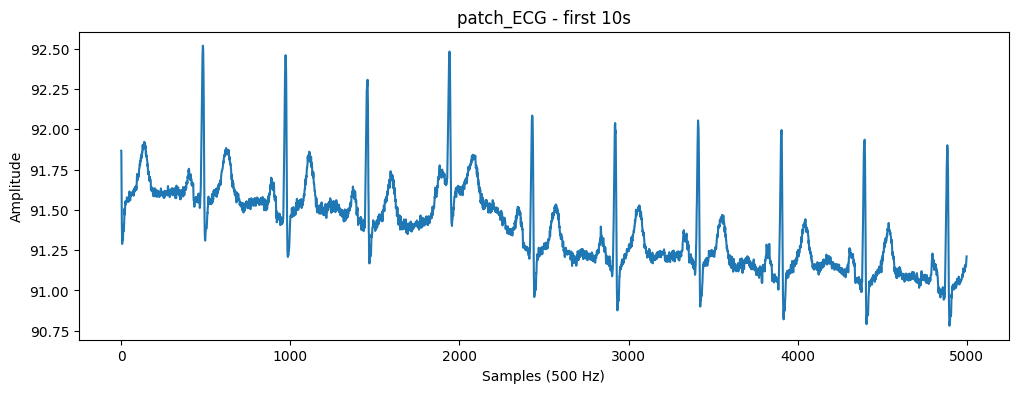

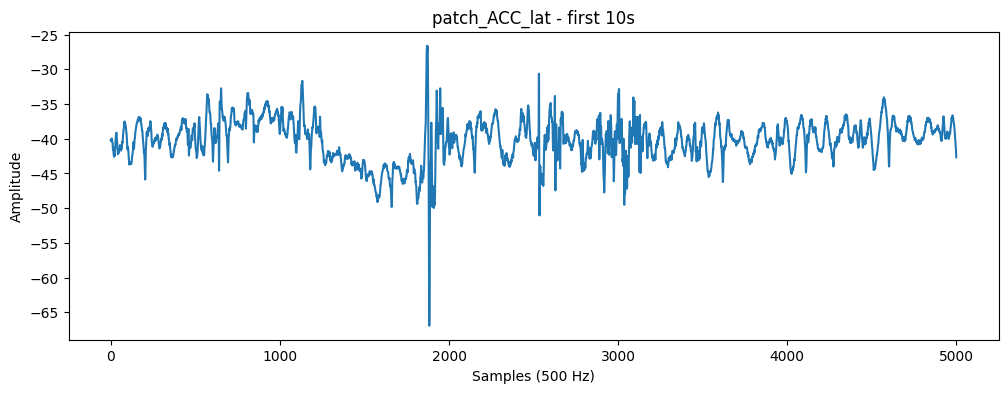

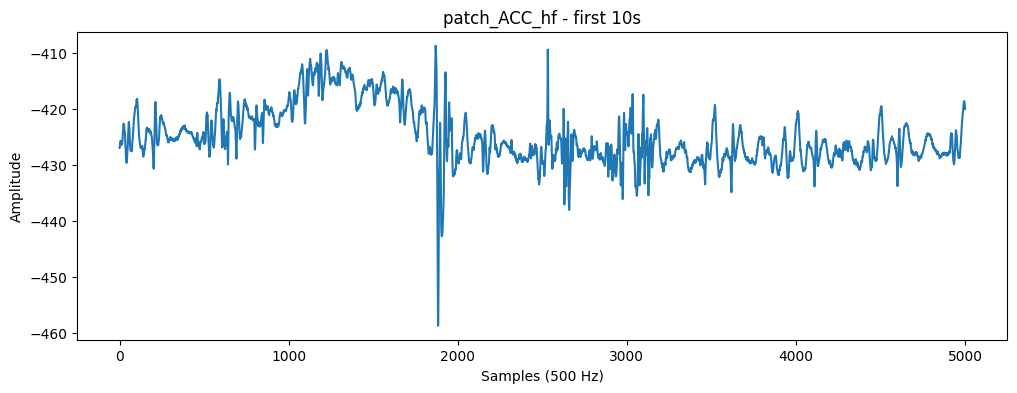

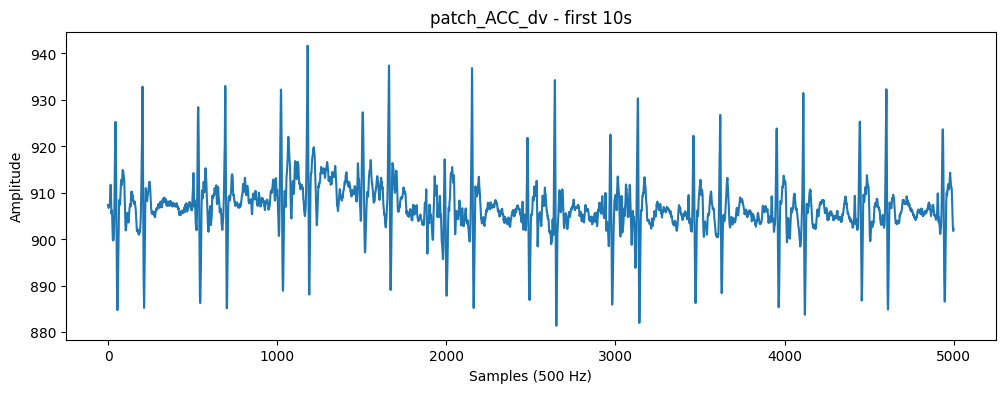

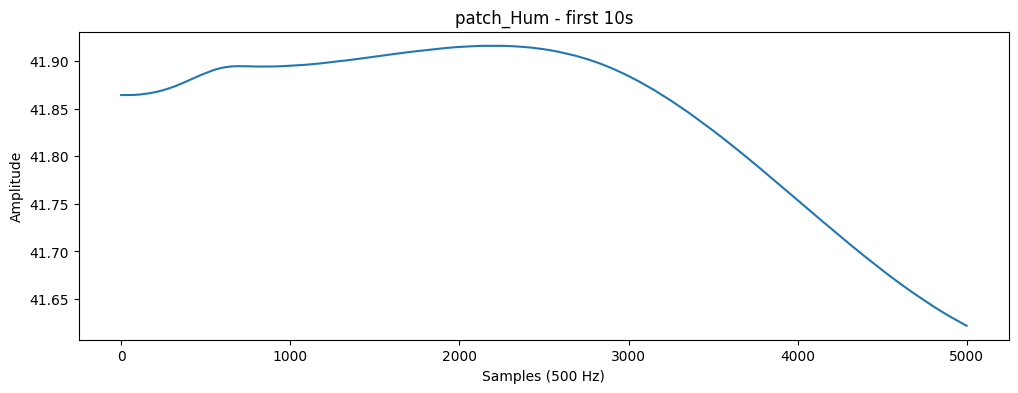

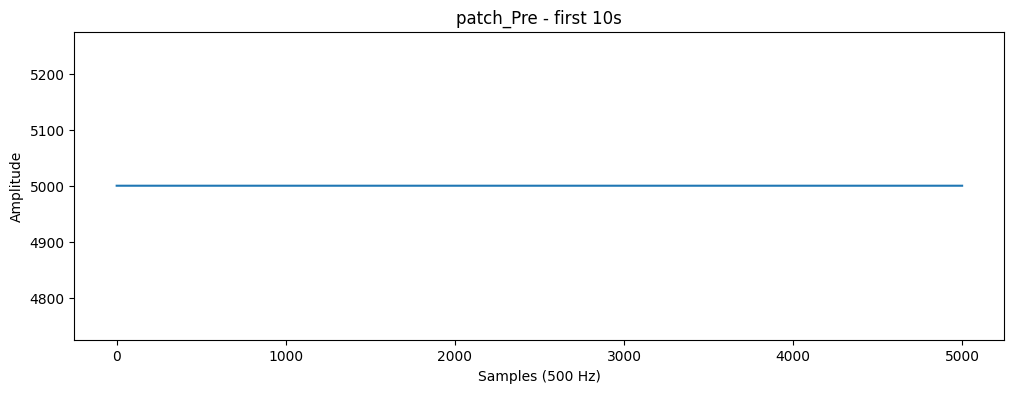

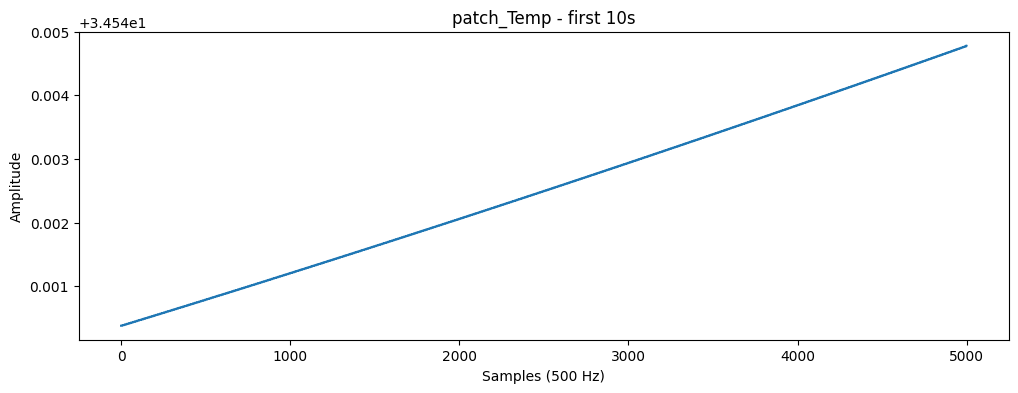

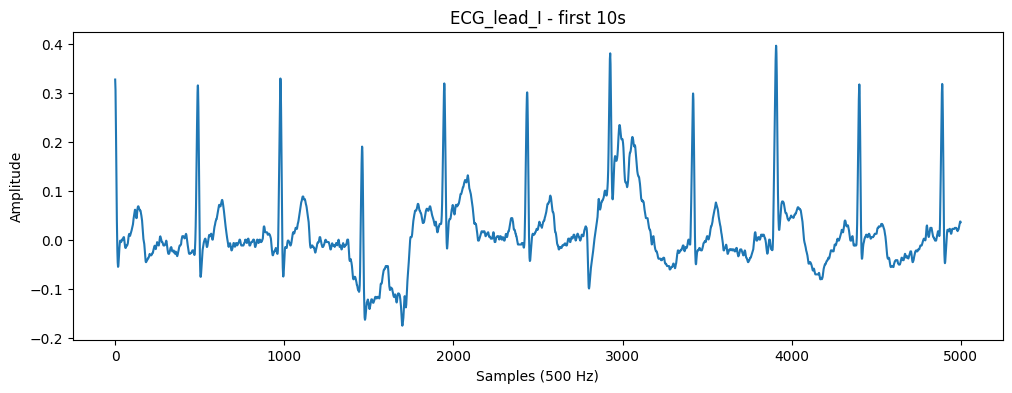

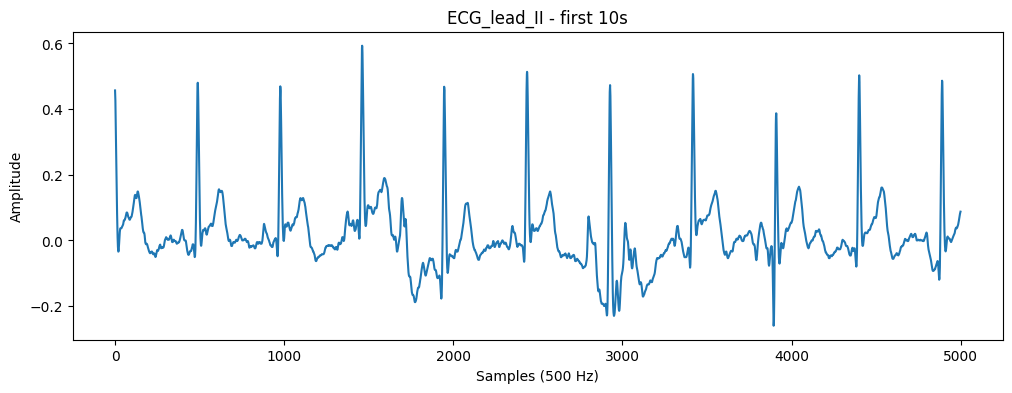

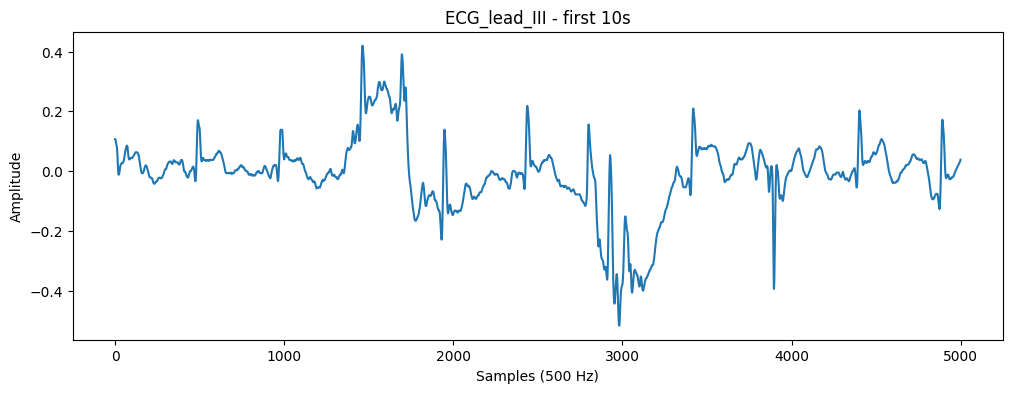

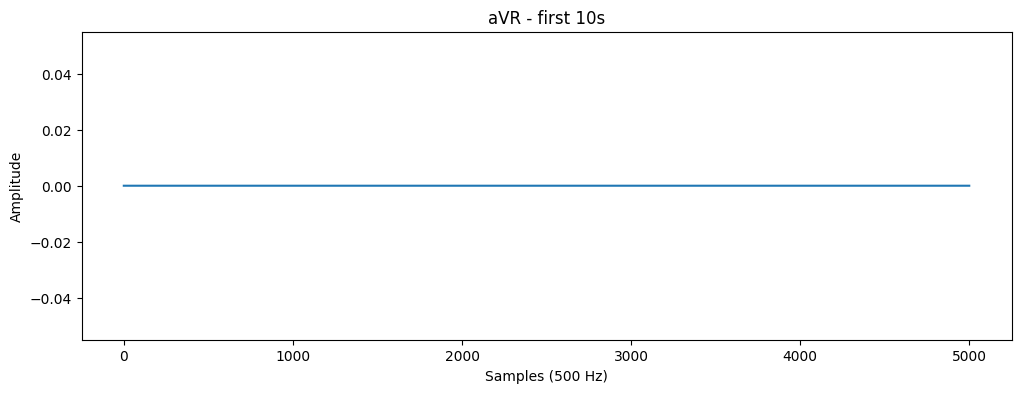

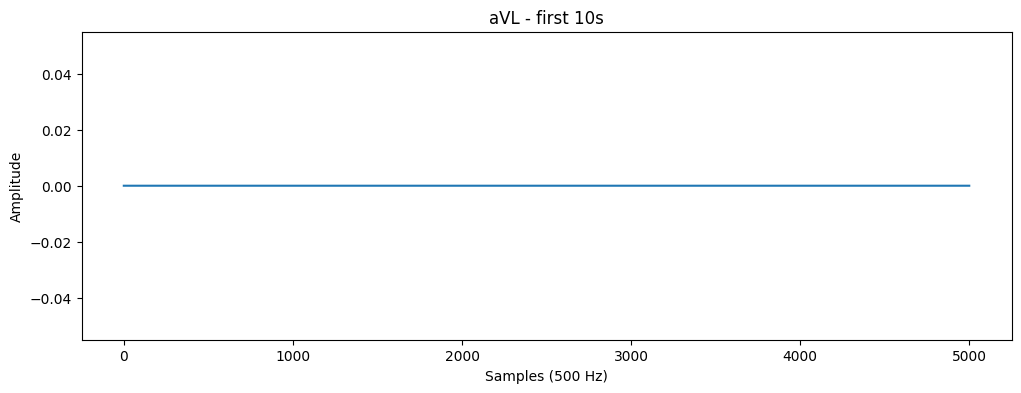

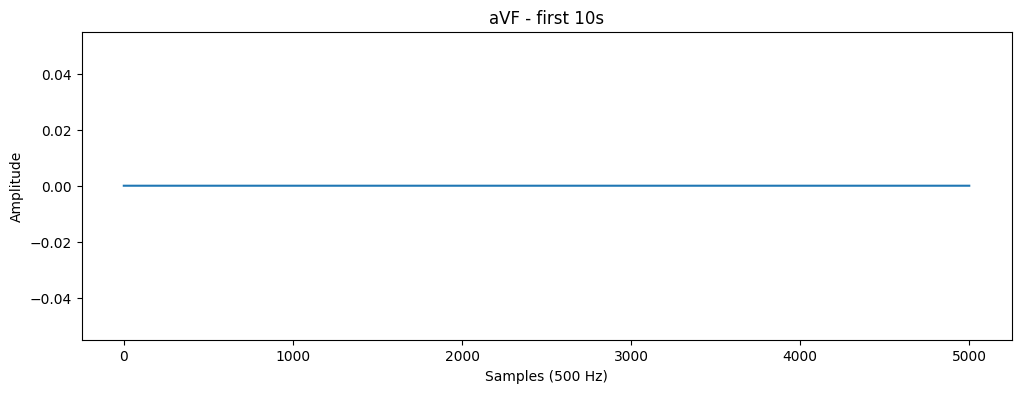

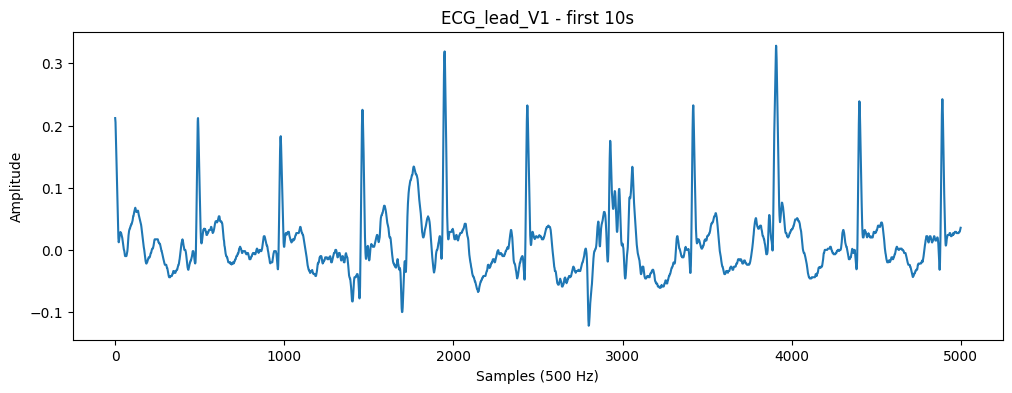

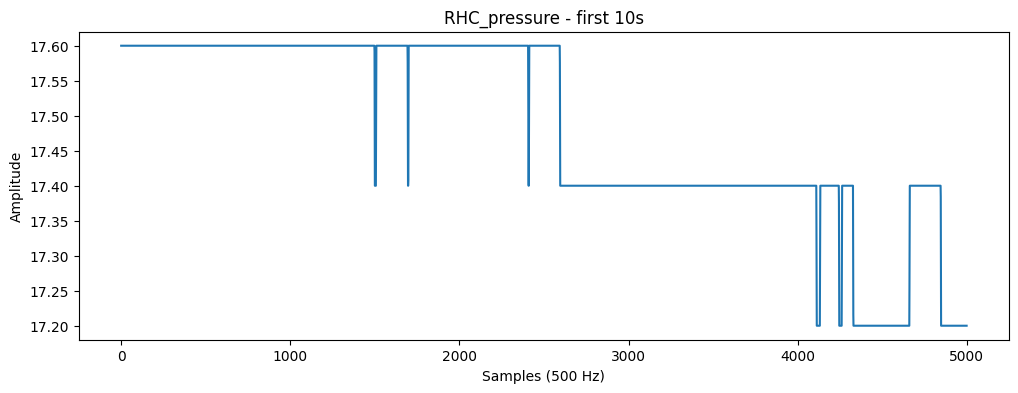

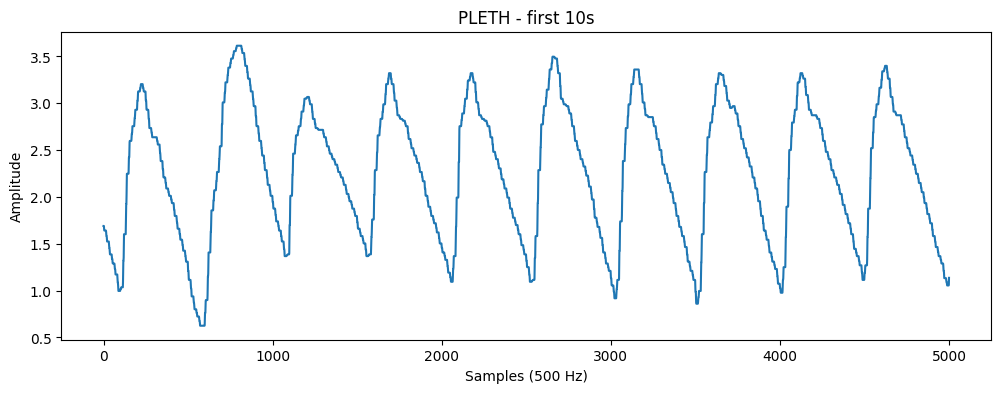

In [5]:
import matplotlib.pyplot as plt
import wfdb


signals = record.p_signal  # should be 2D: (samples, channels)
fields = record.sig_name   # channel names

print(signals.shape)  # e.g. (300000, 16)

for value in fields:  # or your specific subset
    plt.figure(figsize=(12, 4))
    idx = fields.index(value)
    plt.plot(signals[:5000, idx])  # first 10s if fs=500Hz
    plt.title(f"{value} - first 10s")
    plt.xlabel("Samples (500 Hz)")
    plt.ylabel("Amplitude")
    plt.show()


In [6]:
meta_dir = Path("processed_data")
records = []

for json_file in meta_dir.glob("TRM*-RHC*.json"):
    with open(json_file, "r") as f:
        data = json.load(f)
        data["record_id"] = json_file.stem
        records.append(data)

df_meta = pd.DataFrame(records)
df_meta

,age,height,weight,gender,sbp,dbp,history of patient,CDecomp,PDecomp,NYHAC,...,MacStTime,MacEndTime,ChamEvents_in_s,ChamEvents,maclabMeas,outpatient,heart failure,Missing_MaclabRHC,fine_alignment,record_id
0,49,175.250,75.81250,Male,105,71,"HFrEF, ICM, CAD s/p CABG, moderate MR, LV thro...",0,1,3,...,01-Jan-2000 12:28:23,01-Jan-2000 12:58:27,"{'RA': 200.0, 'RV': 326.0, 'PA': 804.0, 'PCW':...","{'RA': '01-Jan-2000 12:31:43 PM', 'RV': '01-Ja...","{'RAA Wave ': 10.0, 'RAV Wave ': 15.0,...",True,True,False,True,TRM197-RHC1
1,43,175.250,106.62500,Male,120,64,"HFpEF, pHTN, AF, CKD3, congestive hepatopathy,...",1,0,3,...,01-Jan-2000 14:00:56,01-Jan-2000 14:46:00,"{'RA': 96.0, 'RV': 252.0, 'PA': 286.0, 'PCW': ...","{'RA': '01-Jan-2000 2:02:32 PM', 'RV': '01-Jan...","{'RAA Wave ': 14.0, 'RAV Wave ': 13.0,...",True,True,False,True,TRM172-RHC1
2,64,188.000,93.00000,Male,143,83,"HFpEF, CAD s/p PCI, AF s/p multiple ablations ...",0,0,3,...,01-Jan-2000 14:38:46,01-Jan-2000 15:12:16,"{'RA': 34.0, 'RV': 120.0, 'PA': 200.0, 'PCW': ...","{'RA': '01-Jan-2000 2:39:20 PM', 'RV': '01-Jan...","{'RAA Wave ': 5.0, 'RAV Wave ': 11.0, ...",True,True,False,True,TRM166-RHC1
3,41,170.250,74.00000,Male,99,55,"HFrEF 2/2 NICM, AF, LBBB, multiple intracardia...",1,1,3,...,01-Jan-2000 10:42:19,01-Jan-2000 11:01:43,"{'RA': 0.0, 'RV': 1164.0, 'PA': 411.0, 'PCW': ...","{'RA': '01-Jan-2000 10:42:19 AM', 'RV': '01-Ja...","{'RAA Wave ': 9.0, 'RAV Wave ': 10.0, ...",True,True,False,True,TRM158-RHC1
4,60,185.375,96.62500,Male,107,68,"HFrEF, NICM s/p CRT-D, RV dysfunction, DM",1,0,3,...,01-Jan-2000 13:58:35,01-Jan-2000 14:24:40,"{'RA': 5.0, 'RV': 1174.0, 'PA': 334.0, 'PCW': ...","{'RA': '01-Jan-2000 1:58:40 PM', 'RV': '01-Jan...","{'RAA Wave ': 10.0, 'RAV Wave ': 13.0,...",True,True,False,True,TRM179-RHC1
5,63,172.750,123.37500,Female,86,37,"HFrEF, CAD, dilated CM s/p CRT-D, HTN",1,0,3,...,01-Jan-2000 13:59:17,01-Jan-2000 14:07:04,"{'RA': 10.0, 'RV': 401.0, 'PA': 185.0, 'PCW': ...","{'RA': '01-Jan-2000 1:59:27 PM', 'RV': '01-Jan...","{'RAA Wave ': 6.0, 'RAV Wave ': 10.0, ...",True,True,False,True,TRM155-RHC1
6,69,177.750,91.18750,Male,104,61,"HFpEF, ICM, CAD s/p CABG + PCI",1,0,3,...,01-Jan-2000 09:28:29,01-Jan-2000 09:42:26,"{'RA': 62.0, 'RV': 780.0, 'PA': 302.0, 'PCW': ...","{'RA': '01-Jan-2000 9:29:31 AM ', 'RV': '01-Ja...","{'RAA Wave ': 4.0, 'RAV Wave ': 4.0, '...",True,True,False,True,TRM174-RHC1
7,57,172.750,79.37500,Male,97,56,"HFrEF 2/2 NICM, VT s/p ablation, s/p CRT-D, AF...",1,1,3,...,01-Jan-2000 12:57:32,01-Jan-2000 13:18:41,"{'RA': 49.0, 'RV': 222.0, 'PA': 351.0, 'PCW': ...","{'RA': '01-Jan-2000 12:58:21 PM', 'RV': '01-Ja...","{'RAA Wave ': 17.0, 'RAV Wave ': 17.0,...",True,True,False,True,TRM160-RHC1
8,54,165.125,73.50000,Male,119,61,"HFrEF, NICM s/p CRT-D, NSVT, MR",0,1,3,...,01-Jan-2000 11:13:24,01-Jan-2000 11:42:01,"{'RA': 31.0, 'RV': 115.0, 'PA': 639.0, 'PCW': ...","{'RA': '01-Jan-2000 11:13:55 AM ', 'RV': '01-J...","{'RAA Wave ': 13.0, 'RAV Wave ': 11.0,...",True,True,False,False,TRM196-RHC1
9,57,154.875,83.00000,Female,106,55,"HF w/borderline EF, pHTN, OSA on CPAP",0,0,4,...,01-Jan-2000 10:42:19,01-Jan-2000 11:16:08,"{'RA': 33.0, 'RV': 939.0, 'PA': 342.0, 'PCW_tr...","{'RA': '01-Jan-2000 10:42:52 AM', 'RV': '01-Ja...","{'RAA Wave ': 12.0, 'RAV Wave ': 7.0, ...",True,True,False,True,TRM203-RHC1


In [7]:
import numpy as np

patch_ecg = signals[:, fields.index("patch_ECG")]
mac_ecg = signals[:, fields.index("ECG_lead_II")]
corr = np.corrcoef(patch_ecg, mac_ecg)[0,1]
print("Correlation Patch vs MacLab ECG:", corr)

Correlation Patch vs MacLab ECG: -0.013268852594522538


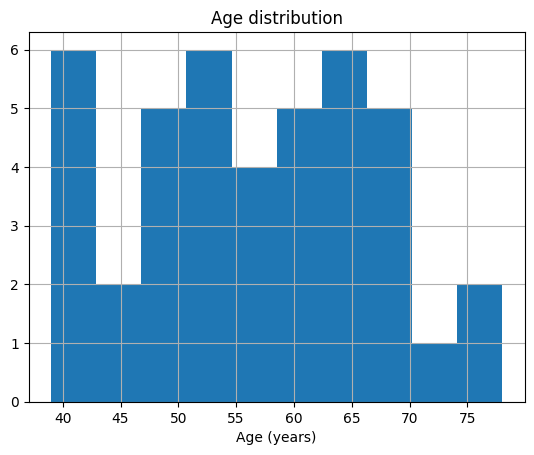

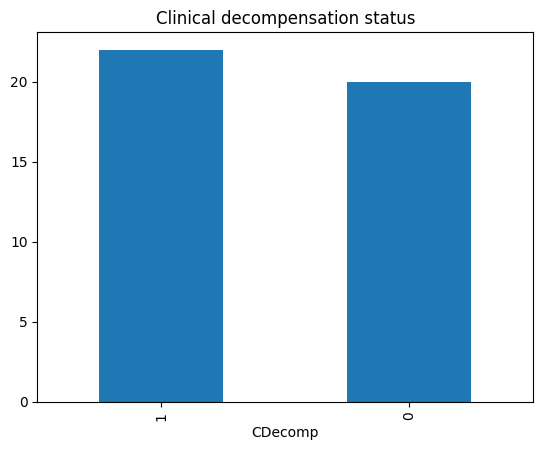

In [8]:
df_meta['age'].hist(bins=10)
plt.title("Age distribution")
plt.xlabel("Age (years)")
plt.show()

df_meta['CDecomp'].value_counts().plot(kind='bar')
plt.title("Clinical decompensation status")
plt.show()

In [9]:
import json
from pathlib import Path
import pandas as pd

# Path to processed_data
data_dir = Path("processed_data")

# List all JSON files
json_files = list(data_dir.glob("TRM*-RHC*.json"))

print(f"Total JSON files found: {len(json_files)}")

# Load all JSONs into a list of dicts
data_list = []
for jf in json_files:
    with open(jf, "r") as f:
        data = json.load(f)
        data['patient_id'] = jf.stem.split('-')[0]  # Extract TRMXXX as patient_id
        data_list.append(data)

# Convert to DataFrame
df = pd.DataFrame(data_list)

# Count unique patients
unique_patients = df['patient_id'].nunique()
print(f"Unique patients represented in these JSONs: {unique_patients}")
print(f"Remaining patients not present in this folder: {73 - unique_patients}")


Total JSON files found: 42
Unique patients represented in these JSONs: 33
Remaining patients not present in this folder: 40
